### Problem 1 A AND B ARE BOTH IN HERE
Used some outside resources for help with this problem.

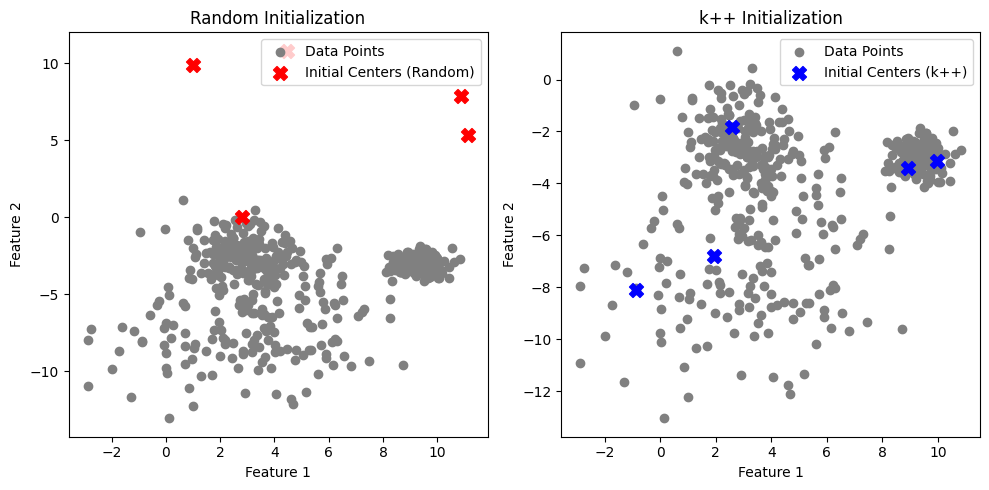

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#HAD SOME
# Load the data set
XData = np.load("C:/Users/Diego/MA326-Mathematics-of-Data-science-HW/HW2/blobs.npy")

# Set the number of clusters (k)
k = 5
m = XData.shape[1]  # Dimension of the data space

# Random Initialization 
c_random = np.random.uniform(-2, 12, (k, m))

# k++ Initialization Function (as defined in the previous script)
def kpp_init(X, k):
    c = np.zeros((k, m))
    c[0, :] = X[np.random.randint(0, len(X)), :]  # Randomly select the first representative vector
    for i in range(1, k):
        dist_sq = np.array([min([np.inner(x-c[j, :], x-c[j, :]) for j in range(i)]) for x in X])
        probs = dist_sq / dist_sq.sum()
        cumulative_probs = probs.cumsum()
        r = np.random.rand()
        for j, p in enumerate(cumulative_probs):
            if r < p:
                c[i, :] = X[j, :]
                break
    return c

c_kpp = kpp_init(XData, k)  # Initialize using k++

# Scatter plot for Random Initialization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  
plt.scatter(XData[:, 0], XData[:, 1], color='gray', label='Data Points')
plt.scatter(c_random[:, 0], c_random[:, 1], color='red', label='Initial Centers (Random)', marker='X', s=100)
plt.title('Random Initialization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Scatter plot for k++ Initialization
plt.subplot(1, 2, 2)  
plt.scatter(XData[:, 0], XData[:, 1], color='gray', label='Data Points')
plt.scatter(c_kpp[:, 0], c_kpp[:, 1], color='blue', label='Initial Centers (k++)', marker='X', s=100)
plt.title('k++ Initialization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()


## C

C:\Users\Diego\AppData\Local\Temp\ipykernel_11980\4079109451.py:30: RuntimeWarning: Mean of empty slice.
  c[i, :] = X[clusters == i].mean(axis=0)
c:\Users\Diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


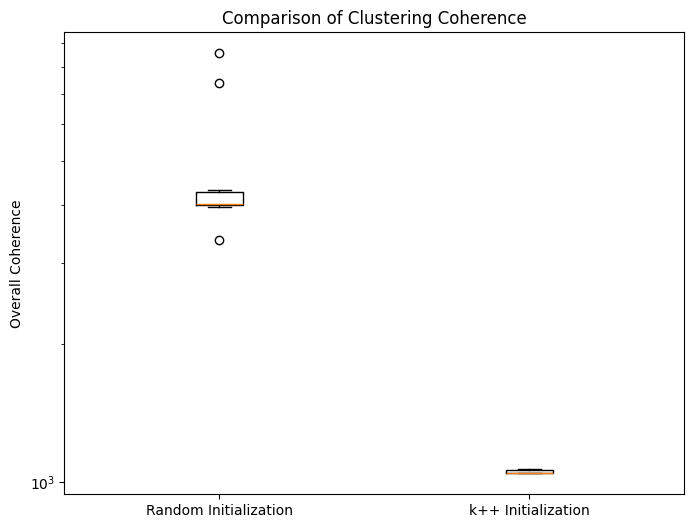

([4005.221820562806,
  4038.2785761985942,
  8569.158003055358,
  4037.6530396630096,
  4320.201905334308,
  3363.8621095221088,
  7395.574534856976,
  4169.471917172011,
  4017.60030697858,
  3962.9291005740033],
 [1046.56764785317,
  1068.6412698254476,
  1047.9077199349729,
  1046.7252064609306,
  1068.7028841849067,
  1045.9213506116364,
  1068.6412698254476,
  1046.7252064609306,
  1047.1949025945387,
  1047.9077199349726])

In [5]:
# Now that the file has been successfully uploaded, we can proceed with the adjusted code to calculate the coherence
# and compare the performance of the two initialization methods

# Path to the dataset file
file_path = 'C:/Users/Diego/MA326-Mathematics-of-Data-science-HW/HW2/blobs.npy'

# Load the dataset
XData = np.load(file_path)  # Correct path for this environment

# Function to perform k-means clustering and return the coherence
def k_means(X, c_init):
    k = c_init.shape[0]
    m = X.shape[1]
    c = np.copy(c_init)
    clusters = np.zeros(len(X))
    prev_c = np.zeros(c.shape)
    max_iter = 300
    iter_count = 0

    while np.linalg.norm(c - prev_c) > 1e-6 and iter_count < max_iter:
        iter_count += 1
        prev_c = np.copy(c)

        # Assign each data point to the closest centroid
        for i, x in enumerate(X):
            clusters[i] = np.argmin([np.linalg.norm(x - c[j, :]) for j in range(k)])

        # Update centroids
        for i in range(k):
            c[i, :] = X[clusters == i].mean(axis=0)

    # Compute coherence
    coherence = 0
    for i in range(k):
        coherence += np.sum((X[clusters == i] - c[i, :])**2)

    return coherence, c

# Run 10 realizations for each initialization and compute coherence
coherences_random = []
coherences_kpp = []

for _ in range(10):
    # Random initialization
    c_random = np.random.uniform(-2, 12, (k, m))
    coherence_random, _ = k_means(XData, c_random)
    coherences_random.append(coherence_random)
    
    # k++ initialization
    c_kpp = kpp_init(XData, k)
    coherence_kpp, _ = k_means(XData, c_kpp)
    coherences_kpp.append(coherence_kpp)

# Plot comparison
plt.figure(figsize=(8, 6))
plt.boxplot([coherences_random, coherences_kpp], labels=['Random Initialization', 'k++ Initialization'])
plt.title('Comparison of Clustering Coherence')
plt.ylabel('Overall Coherence')
plt.yscale('log')  # Using a logarithmic scale for better visualization
plt.show()

# Return the coherences for analysis
coherences_random, coherences_kpp


### Problem 2


In [ ]:
import numpy as np

# Define the matrix A
A = np.array([[3, 4], [-4, -3]])

# Compute the Singular Value Decomposition
U, sigma, VT = np.linalg.svd(A)

# Construct the Σ matrix with singular values
Sigma = np.zeros_like(A, dtype=float)
np.fill_diagonal(Sigma, sigma)

# Compute the rank of A
rank_A = np.linalg.matrix_rank(A)

# Compute the inverse of A using SVD
# A_inv = V * Sigma_inv * U.T
Sigma_inv = np.linalg.inv(Sigma)
A_inv = VT.T @ Sigma_inv @ U.T

# Compute the eigenvalues of A
eigenvalues = np.linalg.eigvals(A)

# Verify det(A) = λ1λ2 and |det(A)| = σ1σ2
det_A = np.linalg.det(A)
det_A_eigenvalues = eigenvalues[0] * eigenvalues[1]
abs_det_A = abs(det_A)
sigma_product = sigma[0] * sigma[1]

U, sigma, VT, rank_A, A_inv, eigenvalues, det_A, det_A_eigenvalues, abs_det_A, sigma_product


### Problem 3

In [ ]:
%pip install scikit-image

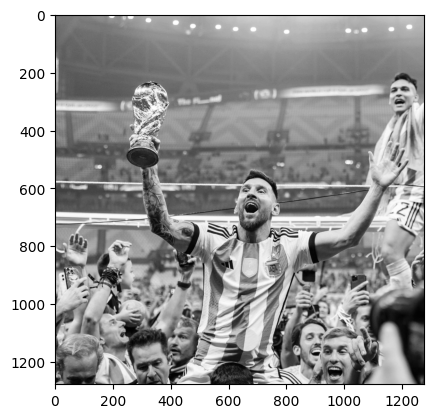

(1278, 1278)

In [1]:
#(A) 

from skimage import io, color
import matplotlib.pyplot as plt

# Read the color image
A = io.imread('C:/Users/Diego/MA326-Mathematics-of-Data-science-HW/HW2/imageforHW2.png')

# If the image has 4 channels (RGBA), remove the alpha channel before converting to grayscale
if A.shape[-1] == 4:
    A = A[..., :3]

# Convert to grayscale
A = color.rgb2gray(A)

# Display the image
plt.imshow(A, cmap='gray')
plt.show()
A.shape

Size of U: (1278, 1278)
Size of D: (1278,)
Size of Vh: (1278, 1278)


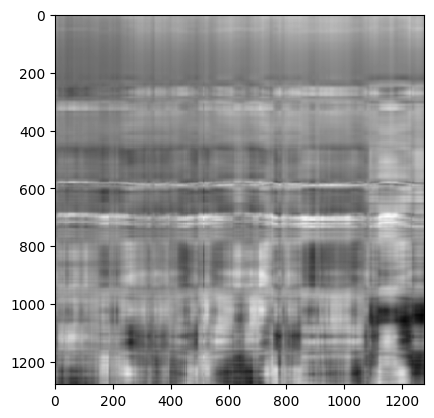

In [24]:
#(B)

U, D, Vh = np.linalg.svd(A)  # full SVD
print("Size of U:", U.shape)
print("Size of D:", D.shape)
print("Size of Vh:", Vh.shape)

# low rank approximation
r = 5

Ur = U[:, :r]
Vhr = Vh[:r, :]
Dr = np.diag(D[:r])

Ar = Ur@Dr@Vhr

plt.imshow(Ar, cmap='gray')
plt.show()


In [25]:
# (C)
import numpy as np
import pandas as pd
U, D, Vt = np.linalg.svd(A, full_matrices=False)
errors = {}

# R approximations and errors
for r in range(1, 11):
    # SOS Rank-r approximation Ar
    Ar = U[:, :r] @ np.diag(D[:r]) @ Vt[:r, :]
    # Computing error 
    error = np.linalg.norm(A - Ar, ord=2)
    errors[r] = error


errors_df = pd.DataFrame(list(errors.items()), columns=['Rank', 'Error'])

# Display the table SOS
print(errors_df)


   Rank      Error
0     1  96.728192
1     2  76.072711
2     3  70.858832
3     4  64.320131
4     5  59.778051
5     6  53.407748
6     7  50.361539
7     8  42.821128
8     9  40.814889
9    10  38.683566
